In [67]:
import pandas as pd
from pprint import pprint
from bs4 import BeautifulSoup
import io

pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns',None) #display all columns
pd.set_option('display.max_rows',None) #display all rows

# Required Input files
# When running for the very first time, `ipl2025_results.csv`` file is required with all the team managers and an initial row of 0s.
# IPL2025MockAuctionSummary.csv file is required with each of the managers, their teams and their players listed.

# Dependencies to install
#  pip3 install beautifulsoup4
#  pip3 install lxml ??? (Double check if required)
#  pip3 install html5lib ??? (Double check if required)
#  pip3 install pywhatkit
#  pip3 install matplotlib
#  pip3 install selenium
#  pip3 install tabulate

In [ ]:
import sys
from datetime import date

# Backup the input and output files for each day for posterity

# Change for each day
ipl_day_0 = date(2025, 3, 21)
ipl_day_cur = date.today()
day_num = abs((ipl_day_cur - ipl_day_0).days)
day = 'day_' + str(day_num)
prev_day = 'day_' + str(day_num - 1)
print(day_num)

# Change for each group
group = sys.argv[1]
print(group)

results_file = f'./{group}/ipl2025_results_{day}.csv'
prev_results_file = f'./{group}/ipl2025_results_{prev_day}.csv'
leaderboard_graph_file = f'./{group}/ipl_leaderboard.png'
leaderboard_file = f'./{group}/ipl_leaderboard.txt'

ipl_mock_auction_summary = f'./{group}/IPL2025MockAuctionSummary.csv'

11
group_1


In [69]:
mvp_df = pd.read_csv(f'./data/mvp_{day}.csv')
mvp_df

,POS,Player,Pts,Mat,Wkts,Dots,4s,6s,Catches,Run outs,Stumpings,Team
0,1,nicholas pooran,102.5,3,0,0,17,15,3,0.0,0,LSG
1,2,travis head,66.0,3,0,0,18,6,0,0.0,0,SRH
2,3,shreyas iyer,65.5,2,0,0,8,13,0,0.0,0,PBKS
3,4,khaleel ahmed,64.0,3,6,40,0,0,0,3.0,0,CSK
4,5,mitchell marsh,60.5,3,0,0,13,8,0,0.0,0,LSG
5,6,noor ahmad,59.5,3,9,28,0,0,0,0.0,0,CSK
6,7,aniket verma,54.5,3,0,0,5,12,0,0.0,0,SRH
7,8,ruturaj gaikwad,54.0,3,0,0,13,4,3,0.0,0,CSK
8,9,b. sai sudharsan,53.0,2,0,0,9,8,1,0.0,0,GT
9,10,phil salt,53.0,2,0,0,14,3,3,0.0,0,RCB


In [70]:
fantasy_teams_auction_df = pd.read_csv(ipl_mock_auction_summary)
fantasy_teams_auction_df

,Shashaank,Naren,Sriram,Mahaarajan,Srikumar,Sudarshan,Niranjini,Raghav,Priyanka
0,Punjab Kings,Gujarat Titans,Delhi Capitals,Royal Challengers Bengaluru,Rajasthan Royals,Chennai Super Kings,Sunrisers Hyderabad,Mumbai Indians,Kolkata Knight Riders
1,Glenn Maxwell,Shubman Gill,KL Rahul,Virat Kohli,Yashasvi Jaiswal,Matheesha Pathirana,Travis Head,N Tilak Varma,Venkatesh Iyer
2,Marcus Stoinis,Aiden Markram,Mitchell Starc,Arshdeep Singh,Nitish Rana,Ruturaj Gaikwad,Abhishek Sharma,Suryakumar Yadav,Sunil Narine
3,Shreyas Iyer,Quinton de Kock,Axar Patel,Washington Sundar,Deepak Chahar,Noor Ahmad,Heinrich Klaasen,Trent Boult,Andre Russell
4,Rahul Tripathi,Lockie Ferguson,Mohammed Siraj,Hardik Pandya,Maheesh Theekshana,Abhinav Manohar,Mukesh Kumar,Khaleel Ahmed,T Natarajan
5,Vaibhav Arora,Abdul Samad,Rinku Singh,Mohsin Khan,Rohit Sharma,Mohammed Shami,Harpreet Brar,Nicholas Pooran,Akash Deep
6,Mukesh Choudhary,Kuldeep Yadav,Will Jacks,Tim David,Jos Buttler,Deepak Hooda,Wanindu Hasaranga,Gerald Coetzee,Abishek Porel
7,Shahrukh Khan,Ravichandran Ashwin,Shashank Singh,Shamar Joseph,Devon Conway,Shahbaz Ahamad,Rahul Chahar,Krunal Pandya,Sherfane Rutherford
8,Robin Minz,Varun Chakaravarthy,Angkrish Raghuvanshi,Devdutt Padikkal,Tristan Stubbs,Pat Cummins,Jitesh Sharma,Nathan Ellis,Manish Pandey
9,Ishan Kishan,Liam Livingstone,Mohit Sharma,Rishabh Pant,Rachin Ravindra,MS Dhoni,Bhuvneshwar Kumar,B. Sai Sudharsan,Ajinkya Rahane


In [71]:
fantasy_mgrs = fantasy_teams_auction_df.columns
fantasy_mgrs.to_list()

['Shashaank',
 'Naren',
 'Sriram',
 'Mahaarajan',
 'Srikumar',
 'Sudarshan',
 'Niranjini',
 'Raghav',
 'Priyanka']

In [72]:
#Make new dataframe for manager_teams 
fantasy_mgr_teams = fantasy_teams_auction_df.iloc[:1]
fantasy_mgr_teams

,Shashaank,Naren,Sriram,Mahaarajan,Srikumar,Sudarshan,Niranjini,Raghav,Priyanka
0,Punjab Kings,Gujarat Titans,Delhi Capitals,Royal Challengers Bengaluru,Rajasthan Royals,Chennai Super Kings,Sunrisers Hyderabad,Mumbai Indians,Kolkata Knight Riders


In [73]:
import os
#Create new dataframe for manager_players
fantasy_teams_df = fantasy_teams_auction_df.iloc[1:]
fantasy_teams_df = fantasy_teams_df.apply(lambda x: x.astype(str).str.lower())

fantasy_teams_df_per_mgr = {}
for mgr in fantasy_teams_df.columns:
    mgr_file = f'./{group}/{mgr}.csv'
    if not os.path.exists(mgr_file):
        df = pd.DataFrame(fantasy_teams_df[mgr])
        df.to_csv(mgr_file, index=False)
    else:
        df = pd.read_csv(mgr_file)
    fantasy_teams_df_per_mgr[mgr] = df
fantasy_teams_df


,Shashaank,Naren,Sriram,Mahaarajan,Srikumar,Sudarshan,Niranjini,Raghav,Priyanka
1,glenn maxwell,shubman gill,kl rahul,virat kohli,yashasvi jaiswal,matheesha pathirana,travis head,n tilak varma,venkatesh iyer
2,marcus stoinis,aiden markram,mitchell starc,arshdeep singh,nitish rana,ruturaj gaikwad,abhishek sharma,suryakumar yadav,sunil narine
3,shreyas iyer,quinton de kock,axar patel,washington sundar,deepak chahar,noor ahmad,heinrich klaasen,trent boult,andre russell
4,rahul tripathi,lockie ferguson,mohammed siraj,hardik pandya,maheesh theekshana,abhinav manohar,mukesh kumar,khaleel ahmed,t natarajan
5,vaibhav arora,abdul samad,rinku singh,mohsin khan,rohit sharma,mohammed shami,harpreet brar,nicholas pooran,akash deep
6,mukesh choudhary,kuldeep yadav,will jacks,tim david,jos buttler,deepak hooda,wanindu hasaranga,gerald coetzee,abishek porel
7,shahrukh khan,ravichandran ashwin,shashank singh,shamar joseph,devon conway,shahbaz ahamad,rahul chahar,krunal pandya,sherfane rutherford
8,robin minz,varun chakaravarthy,angkrish raghuvanshi,devdutt padikkal,tristan stubbs,pat cummins,jitesh sharma,nathan ellis,manish pandey
9,ishan kishan,liam livingstone,mohit sharma,rishabh pant,rachin ravindra,ms dhoni,bhuvneshwar kumar,b. sai sudharsan,ajinkya rahane
10,jake fraser-mcgurk,harshit rana,kagiso rabada,rasikh dar,sandeep sharma,akash madhwal,yuzvendra chahal,fazalhaq farooqi,shimron hetmyer


In [74]:
from thefuzz import fuzz
from thefuzz import process
            
# Compute total score for each fantasy team based on MVP points of each player
scores = { fantasy_mgr:0 for fantasy_mgr in fantasy_mgrs.to_list() }
for mgr in fantasy_mgrs:
    print(mgr)
    mgr_df = fantasy_teams_df_per_mgr[mgr]
    mgr_day_pts = {}
    mgr_file = f'./{group}/{mgr}.csv'
    all_players_have_min_pts = True
    mvp_players_with_pts = mvp_df['Player'].to_list()
    for i in range(len(fantasy_teams_df[mgr])):
        player_name = str(fantasy_teams_df[mgr].iloc[i]).lower()
        if player_name in mvp_players_with_pts:
            player_score = float(mvp_df.loc[mvp_df['Player'] == fantasy_teams_df[mgr].iloc[i],'Pts'].iloc[0])
            scores[mgr] += player_score
            mgr_day_pts[player_name] = player_score
            print(f'\t{player_name} points found. Adding his score {player_score} to total. New score {scores[mgr]}')
        else:
            closest_match = process.extractOne(player_name, mvp_players_with_pts)
            mgr_day_pts[player_name] = 0.0
            print(f'\t{player_name} not found in mvp_table... Double check the spelling of player name, closest match is {closest_match}')
            all_players_have_min_pts = False
    mgr_df[f'{day}'] = mgr_df[mgr].map(mgr_day_pts)
    mgr_df = mgr_df.reindex(sorted(mgr_df.columns, key = lambda x: int(x.split("_")[1] if '_' in x else 0)), axis=1)
    mgr_df.to_csv(mgr_file, index=False)
    print(f'*{day.upper()}*\n```\n{mgr_df.to_markdown(index=False)}\n```')
    if all_players_have_min_pts:
        print(f'All players have min fantasy points.')

Shashaank
	glenn maxwell points found. Adding his score 23.0 to total. New score 23.0
	marcus stoinis points found. Adding his score 17.5 to total. New score 40.5
	shreyas iyer points found. Adding his score 65.5 to total. New score 106.0
	rahul tripathi points found. Adding his score 13.5 to total. New score 119.5
	vaibhav arora points found. Adding his score 23.5 to total. New score 143.0
	mukesh choudhary not found in mvp_table... Double check the spelling of player name, closest match is ('mukesh kumar', 71)
	shahrukh khan points found. Adding his score 7.0 to total. New score 150.0
	robin minz not found in mvp_table... Double check the spelling of player name, closest match is ('rinku singh', 57)
	ishan kishan points found. Adding his score 51.0 to total. New score 201.0
	jake fraser-mcgurk points found. Adding his score 22.0 to total. New score 223.0
	jofra archer points found. Adding his score 34.0 to total. New score 257.0
	rashid khan points found. Adding his score 19.0 to tot

In [75]:
scores

{'Shashaank': 276.0,
 'Naren': 358.5,
 'Sriram': 290.5,
 'Mahaarajan': 196.5,
 'Srikumar': 328.0,
 'Sudarshan': 310.5,
 'Niranjini': 262.5,
 'Raghav': 358.0,
 'Priyanka': 225.5}

In [76]:
ipl_team_pts_tbl = pd.read_csv(f'./data/standings_{day}.csv')
ipl_team_pts_tbl

,Teams,M,W,L,T,N/R,PT,NRR,Series Form,Next,For,Against
0,Royal Challengers Bengaluru,2,2,0,0,0,4,2.266,WW,"vs GT, MI, DC",373/36.2,320/40.0
1,Punjab Kings,2,2,0,0,0,4,1.485,WW,"vs RR, CSK, SRH",420/36.2,403/40.0
2,Delhi Capitals,2,2,0,0,0,4,1.320,WW,"vs CSK, RCB, MI",377/35.3,372/40.0
3,Gujarat Titans,2,1,1,0,0,2,0.625,LW,"vs RCB, SRH, RR",428/40.0,403/40.0
4,Mumbai Indians,3,1,2,0,0,2,0.309,LLW,"vs LSG, RCB, DC",436/52.5,470/59.1
5,Lucknow Super Giants,3,1,2,0,0,2,-0.150,LWL,"vs MI, KKR, GT",573/56.1,578/55.5
6,Chennai Super Kings,3,1,2,0,0,2,-0.771,WLL,"vs DC, PBKS, KKR",480/59.1,533/60.0
7,Sunrisers Hyderabad,3,1,2,0,0,2,-0.871,WLL,"vs KKR, GT, PBKS",639/60.0,601/52.1
8,Rajasthan Royals,3,1,2,0,0,2,-1.112,LLW,"vs PBKS, GT, RCB",575/60.0,615/57.3
9,Kolkata Knight Riders,3,1,2,0,0,2,-1.428,LWL,"vs SRH, LSG, CSK",443/57.3,449/49.1


In [77]:
for mgr in fantasy_teams_df.columns:
    no_of_wins = 0
    if fantasy_mgr_teams[mgr].item() in ipl_team_pts_tbl.Teams.to_list():
        no_of_wins = ipl_team_pts_tbl.loc[ipl_team_pts_tbl['Teams'] == fantasy_mgr_teams[mgr].item(),'W'].item()
        if no_of_wins == '-':
            no_of_wins=0
        scores[mgr] += (float(no_of_wins)*50)
        print(f'{str(mgr)}\t{str(fantasy_mgr_teams[mgr].values)}\t{str(no_of_wins)}')

Shashaank	['Punjab Kings']	2
Naren	['Gujarat Titans']	1
Sriram	['Delhi Capitals']	2
Mahaarajan	['Royal Challengers Bengaluru']	2
Srikumar	['Rajasthan Royals']	1
Sudarshan	['Chennai Super Kings']	1
Niranjini	['Sunrisers Hyderabad']	1
Raghav	['Mumbai Indians']	1
Priyanka	['Kolkata Knight Riders']	1


In [78]:
prev_scores = pd.read_csv(prev_results_file, header=None)
prev_scores = prev_scores.T
new_header = prev_scores.iloc[0]
prev_scores = prev_scores[1:]
prev_scores.columns = new_header
prev_scores_dicts = prev_scores.to_dict(orient='records')
prev_scores_dicts

[{'Sriram': 0.0,
  'Raghav': 0.0,
  'Srikumar': 0.0,
  'Naren': 0.0,
  'Sudarshan': 0.0,
  'Niranjini': 0.0,
  'Shashaank': 0.0,
  'Priyanka': 0.0,
  'Mahaarajan': 0.0},
 {'Sriram': 34.5,
  'Raghav': 18.5,
  'Srikumar': 0.0,
  'Naren': 30.0,
  'Sudarshan': 0.0,
  'Niranjini': 26.0,
  'Shashaank': 7.5,
  'Priyanka': 65.5,
  'Mahaarajan': 88.0},
 {'Sriram': 61.0,
  'Raghav': 83.5,
  'Srikumar': 108.0,
  'Naren': 71.0,
  'Sudarshan': 132.0,
  'Niranjini': 146.0,
  'Shashaank': 62.0,
  'Priyanka': 84.5,
  'Mahaarajan': 88.0},
 {'Sriram': 159.5,
  'Raghav': 128.0,
  'Srikumar': 127.0,
  'Naren': 101.5,
  'Sudarshan': 147.5,
  'Niranjini': 153.5,
  'Shashaank': 62.0,
  'Priyanka': 103.0,
  'Mahaarajan': 94.5},
 {'Sriram': 205.5,
  'Raghav': 164.0,
  'Srikumar': 147.5,
  'Naren': 117.0,
  'Sudarshan': 147.5,
  'Niranjini': 157.5,
  'Shashaank': 190.0,
  'Priyanka': 123.5,
  'Mahaarajan': 118.0},
 {'Sriram': 213.0,
  'Raghav': 164.0,
  'Srikumar': 188.5,
  'Naren': 206.0,
  'Sudarshan': 147.5,

In [79]:
current_scores_dict = prev_scores_dicts + [scores]

In [80]:
graph_scores = pd.DataFrame(current_scores_dict)
graph_scores

,Sriram,Raghav,Srikumar,Naren,Sudarshan,Niranjini,Shashaank,Priyanka,Mahaarajan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,34.5,18.5,0.0,30.0,0.0,26.0,7.5,65.5,88.0
2,61.0,83.5,108.0,71.0,132.0,146.0,62.0,84.5,88.0
3,159.5,128.0,127.0,101.5,147.5,153.5,62.0,103.0,94.5
4,205.5,164.0,147.5,117.0,147.5,157.5,190.0,123.5,118.0
5,213.0,164.0,188.5,206.0,147.5,163.0,220.0,187.0,118.0
6,213.0,202.5,188.5,220.5,195.0,202.0,220.0,187.0,124.0
7,236.5,225.5,203.5,245.0,254.0,243.5,222.5,187.0,207.5
8,271.0,282.0,239.5,311.0,254.0,243.5,233.5,194.0,230.5
9,370.0,304.0,361.5,355.0,331.5,298.5,283.0,240.0,230.5


In [81]:
graph_scores_t = graph_scores.T
graph_scores_t = graph_scores_t.sort_values(by=graph_scores_t.columns[-1], ascending=False)
graph_scores_t.to_csv(results_file, header=False)
graph_scores_t

,0,1,2,3,4,5,6,7,8,9,10,11
Naren,0.0,30.0,71.0,101.5,117.0,206.0,220.5,245.0,311.0,355.0,371.5,408.5
Raghav,0.0,18.5,83.5,128.0,164.0,164.0,202.5,225.5,282.0,304.0,388.5,408.0
Sriram,0.0,34.5,61.0,159.5,205.5,213.0,213.0,236.5,271.0,370.0,390.5,390.5
Srikumar,0.0,0.0,108.0,127.0,147.5,188.5,188.5,203.5,239.5,361.5,378.0,378.0
Shashaank,0.0,7.5,62.0,62.0,190.0,220.0,220.0,222.5,233.5,283.0,283.0,376.0
Sudarshan,0.0,0.0,132.0,147.5,147.5,147.5,195.0,254.0,254.0,331.5,331.5,360.5
Niranjini,0.0,26.0,146.0,153.5,157.5,163.0,202.0,243.5,243.5,298.5,298.5,312.5
Mahaarajan,0.0,88.0,88.0,94.5,118.0,118.0,124.0,207.5,230.5,230.5,242.5,296.5
Priyanka,0.0,65.5,84.5,103.0,123.5,187.0,187.0,187.0,194.0,240.0,275.5,275.5


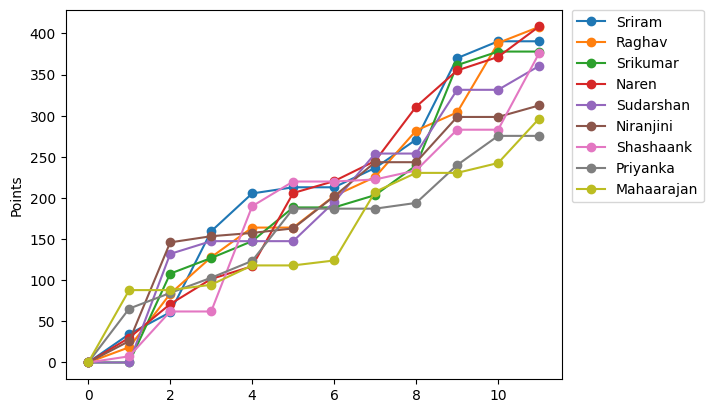

In [82]:
import matplotlib.pyplot as plt
ax = graph_scores.plot.line(marker='o')
#ax.set_xlabel("Days")
ax.set_ylabel("Points")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig(leaderboard_graph_file, bbox_inches="tight")
plt.show()

In [83]:
scores_sorted = {k: v for k, v in sorted(scores.items(), key=lambda item: item[1], reverse=True)}
score_msg = str(scores_sorted)

scores_msg_df = pd.DataFrame(
    scores_sorted.items(),
    columns=['Manager', 'Points']
)
leaderboard_table = f'*{day.upper()}*\n```\n{scores_msg_df.to_markdown(index=False)}\n```'
print()
with open(leaderboard_file, 'w') as f:
    f.write(leaderboard_table)